In [95]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_column", None)

# Carga

In [96]:
df_raw = pd.read_csv("./spotify-tracks.csv", encoding="UTF-8", sep=",")
df_raw.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Limpieza

In [97]:
df_process = df_raw.copy()
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Borrar nulos y columna _Unnamed:0_

In [98]:
df_process = df_process.dropna()
df_process = df_process.drop(columns=["Unnamed: 0"])
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

Convertir variables categóricas

In [99]:
pitch_class_dict = {
    0: 'C',
    1: 'C♯',
    2: 'D',
    3: 'D♯',
    4: 'E',
    5: 'F',
    6: 'F♯',
    7: 'G',
    8: 'G♯',
    9: 'A',
    10: 'B♭',
    11: 'B'
}
df_process["key"] = df_process["key"].apply(lambda key: pitch_class_dict[key] if key in pitch_class_dict.keys() else "C")
df_process["key"] = pd.Categorical(df_process["key"])
df_process["mode"] = pd.Categorical(df_process["mode"])
df_process["time_signature"] = pd.Categorical(df_process["time_signature"])

Duración a minutos

In [100]:
df_process["duration_ms"] = df_process["duration_ms"] / (1000 * 60)
df_process.rename(columns={"duration_ms":"duration_min"}, inplace=True)

# Análisis Exploratorio

## Popularidad

Distribución de la popularidad

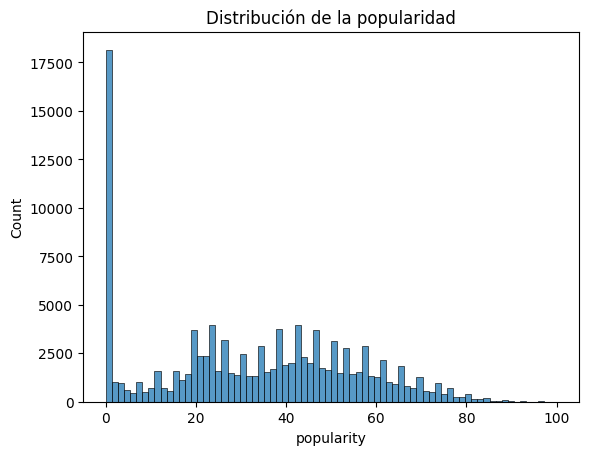

In [101]:
sns.histplot(df_process["popularity"])
plt.title("Distribución de la popularidad")
plt.show()

Según la distribución de arriba aproximadamente 17500 registros contienen un valor de popularidad 0. Se puede asumir que estos registros no fueron asignados una calificación de populariadad por esta razón se eliminan del dataset

In [102]:
df_process = df_process[df_process["popularity"] != 0]
print(f'{len(df_process)} tiene popularidad diferente a 0')

97980 tiene popularidad diferente a 0


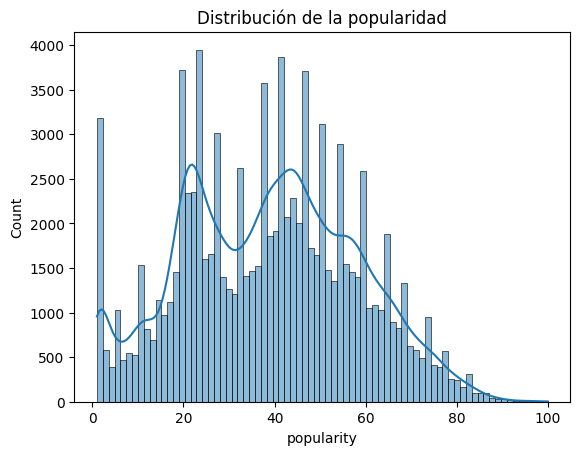

In [103]:
sns.histplot(df_process["popularity"], kde=True)
plt.title("Distribución de la popularidad")
plt.show()

In [104]:
df_process.describe().transpose().drop(columns=["count"])

,mean,std,min,25%,50%,75%,max
popularity,38.673127,19.201246,1.000000,23.000000,39.00000,53.000000,100.00000
duration_min,3.839890,1.844892,0.404433,2.924133,3.58970,4.422883,87.28825
danceability,0.565668,0.172703,0.000000,0.456000,0.57800,0.693000,0.98500
energy,0.645716,0.250406,0.000000,0.475000,0.68700,0.858000,1.00000
loudness,-8.265888,4.987856,-49.531000,-10.057000,-7.07100,-5.027000,4.53200
speechiness,0.086405,0.110205,0.000000,0.035900,0.04900,0.085600,0.96500
acousticness,0.310722,0.329796,0.000000,0.014700,0.16700,0.589000,0.99600
instrumentalness,0.164786,0.316083,0.000000,0.000000,0.00006,0.072725,1.00000
liveness,0.217925,0.195809,0.000000,0.098500,0.13300,0.280000,1.00000
valence,0.468711,0.258619,0.000000,0.254000,0.45500,0.675000,0.99500


Posterior a la eliminación de los registros con popularidad = 0 se analiza la distribución final de la probabilidad. La mayoría de canciones tienen una popularidad menor a 53. Con picos al rededor del 25% y la mediana

## Duración

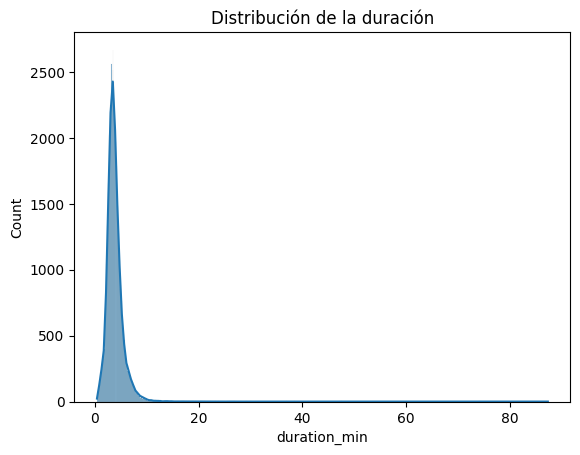

In [105]:
sns.histplot(df_process["duration_min"], kde=True)
plt.title("Distribución de la duración")
plt.show()

En la distribución de arriba se puede observar que la mayoría de canciones (75%) no supera los 5 minutos en duración. Se entiende que los tracks con una duración mayor corresponden a pistas estilo "mix" o incluso "podcast". Bajo este criterio se eliminan del dataset los registros con una duración mayor a 10 minutos

In [106]:
df_process = df_process[df_process["duration_min"] <= 10]
print(f'{len(df_process)} registros tienen una duración menor o igual a 5 minutos. Se entiende que este dataset contiene unicamente registros de canciones')

97447 registros tienen una duración menor o igual a 5 minutos. Se entiende que este dataset contiene unicamente registros de canciones


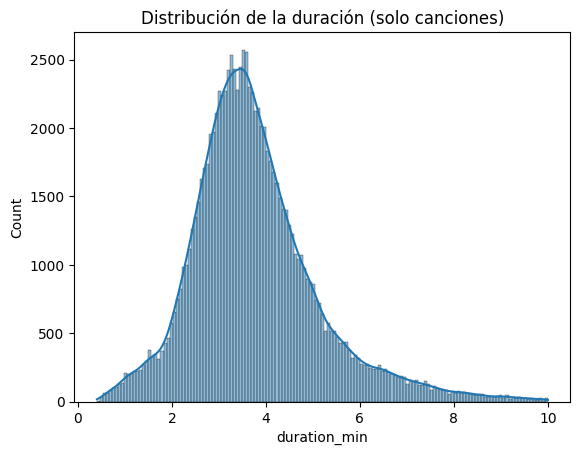

In [107]:
sns.histplot(df_process["duration_min"], kde=True)
plt.title("Distribución de la duración (solo canciones)")
plt.show()

In [108]:
df_process.describe().transpose().drop(columns="count")

,mean,std,min,25%,50%,75%,max
popularity,38.732490,19.202155,1.000000,23.000000,39.000000,53.0000,100.000000
duration_min,3.773517,1.358813,0.404433,2.920833,3.583767,4.4040,9.999983
danceability,0.566291,0.172178,0.000000,0.457000,0.578000,0.6930,0.985000
energy,0.646194,0.250202,0.000000,0.476000,0.688000,0.8580,1.000000
loudness,-8.245831,4.973989,-49.531000,-10.032000,-7.056000,-5.0205,4.532000
speechiness,0.086280,0.109632,0.000000,0.035800,0.049000,0.0857,0.965000
acousticness,0.310328,0.329527,0.000000,0.014700,0.166000,0.5880,0.996000
instrumentalness,0.163371,0.314969,0.000000,0.000000,0.000058,0.0682,1.000000
liveness,0.217607,0.195409,0.000000,0.098500,0.133000,0.2800,1.000000
valence,0.469526,0.258329,0.000000,0.256000,0.456000,0.6760,0.995000


Histogramas para otras variables continuas

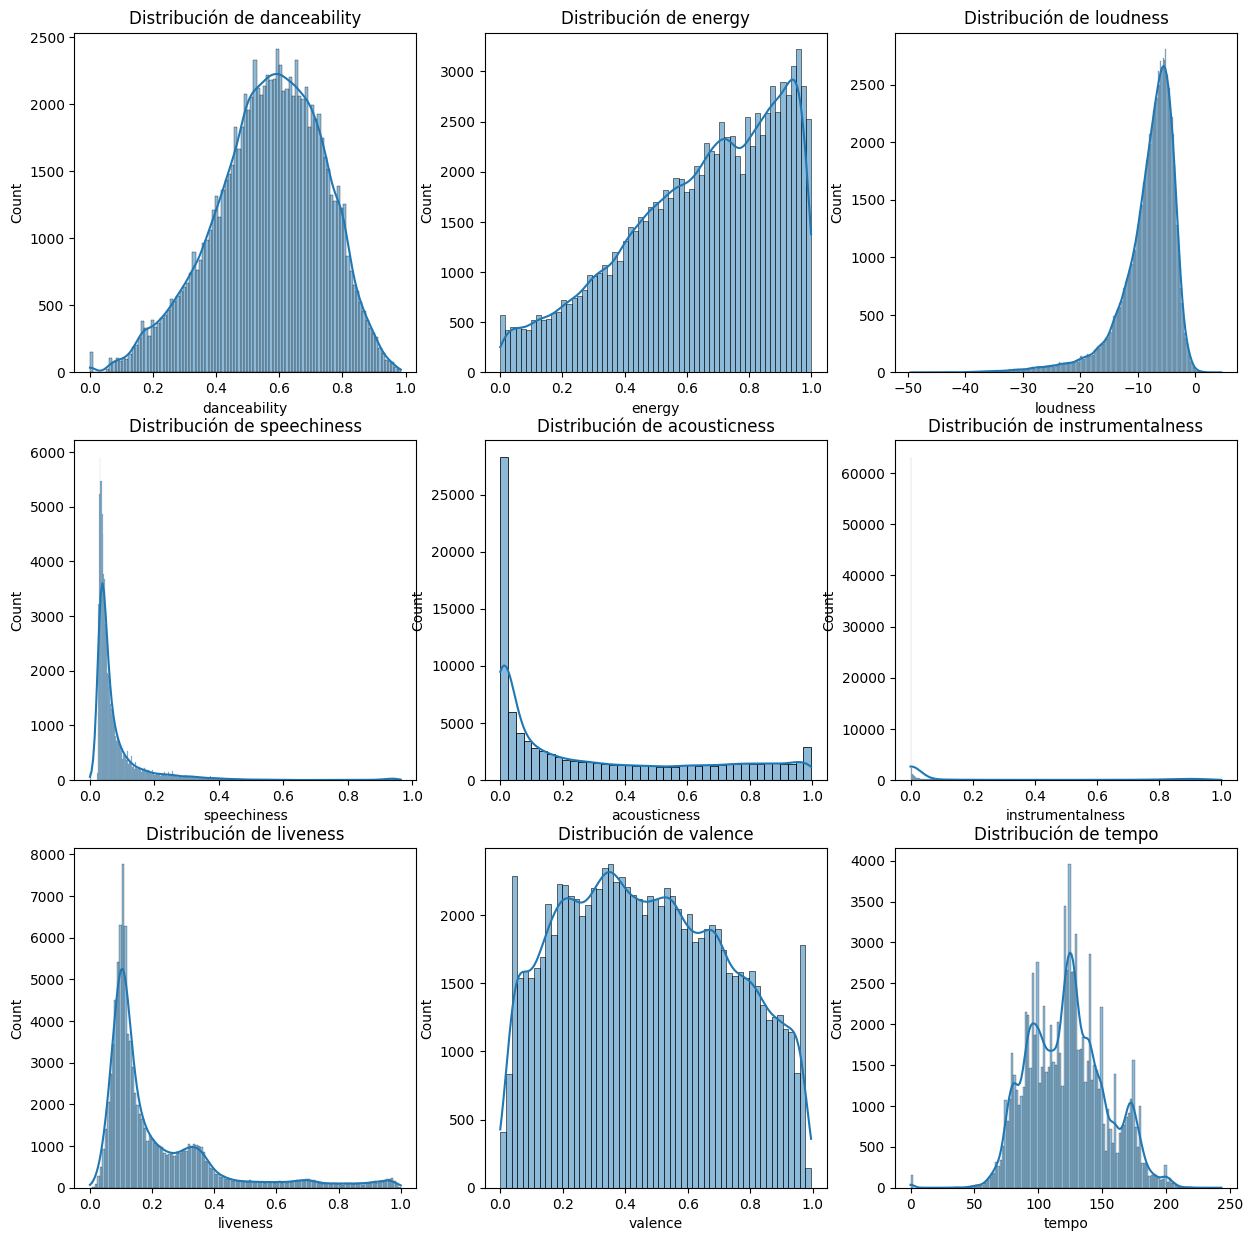

In [131]:
fig, axes = plt.subplots(3, 3, figsize=(15, 5 * 3))
i = 0
j = 0
for col in df_process.columns:
    if(col in ("popularity", "duration_min")):
        continue
    if(df_process[col].dtype in ["int64", "float64"]):
        sns.histplot(df_process[col], kde=True, ax=axes[i][j])
        axes[i][j].set_title(f"Distribución de {col}")
        j += 1
        if(j==3):
            j=0
            i+=1
        

**Conclusiones**

* La mayoría de registros tiene un índice de _bailabilidad_ alrededor de 0.6
* La mayor cantidad de registros en el dataset tiene un alto indece de energía
* La mayoría de registros tiene un volumen alto, con respecto a la referencia 0dB
* La mayoría de registros tiene un índice bajo de palabras habladas
* La mayoría de registros tiene una bajo índice de acústica en su música
* La mayoría de registros tiene letra, es decir no son instrumentales
* La mayoría de regsitros no son grabados en vivo
* La mayoría de registros tiene un tempo alrededor de 125 BPM

**Diagramas de disperción**
Se gráfica cada caracterísica numérica continua con respecto a la popularidad

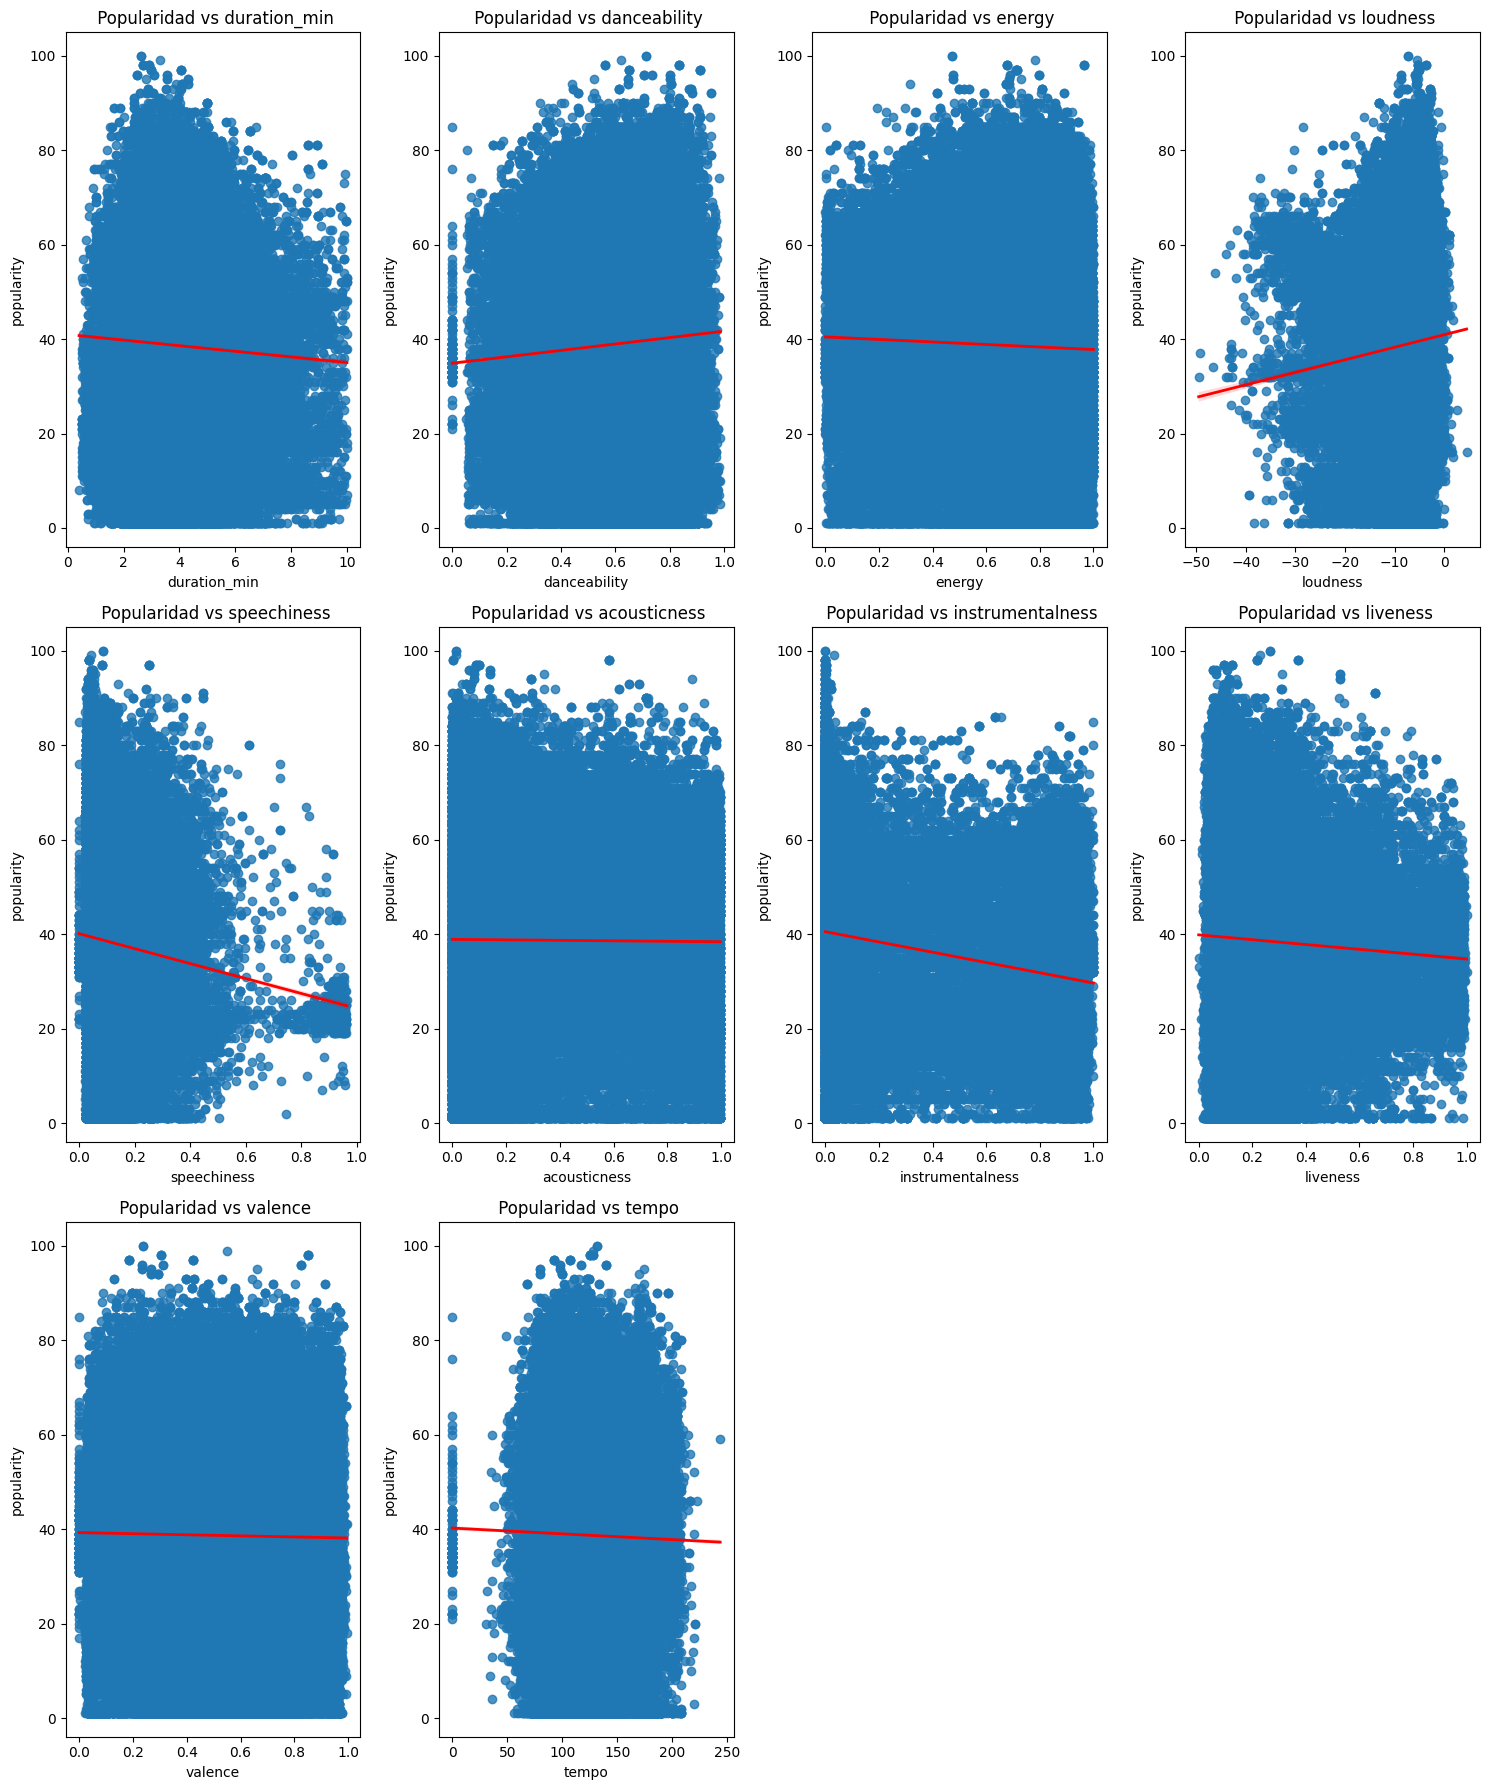

In [142]:
fig, axes = plt.subplots(3, 4, figsize=(15, 6 * 3))
i = 0
j = 0
for col in df_process.columns:
    if(col in ("popularity")):
        continue
    if(df_process[col].dtype in ["int64", "float64"]):
        sns.regplot(x=df_process[col],y=df_process["popularity"] ,ax=axes[i][j], line_kws={'color': 'red', 'linewidth': 2})
        axes[i][j].set_title(f" Popularidad vs {col}")
        j += 1
        if(j==4):
            j=0
            i+=1
fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])
plt.tight_layout()
plt.show()